# 1. Đọc dữ liệu (1 điểm)

In [1]:
import pandas as pd

# Đọc dữ liệu
df = pd.read_csv("black_friday.csv")
# Hiển thị 5 dòng đầu tiên
print(df.head()) 

   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN   

# 2. Thông tin dữ liệu (1 điểm)

In [3]:
# Kiểm tra số dòng và số cột
print("số dòng",df.shape[0])
print("số cột",df.shape[1])
# Kiểm tra số lượng giá trị bị thiếu trong từng cột
df.isna().sum()


số dòng 550068
số cột 12


User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

Nhận xét:
-
-
-

# 3. Phân loại thuộc tính (1 điểm)


In [4]:
# Code
categorical = df.select_dtypes(include=['object']).columns.tolist()
numerical = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Các thuộc tính định tính (Categorical):", categorical)
print("Các thuộc tính định lượng (Numerical):", numerical)
# df.describe()

Các thuộc tính định tính (Categorical): ['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']
Các thuộc tính định lượng (Numerical): ['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']


- Các thuộc tính định tính (Categorical):



- Các thuộc tính định lượng (Numerical):




# 4. Sản phẩm phổ biến (1 điểm)

In [15]:
# Số lượng loại sản phẩm khác nhau
df["Product_ID"].value_counts()

# Sản phẩm được mua nhiều nhất



P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00203642       1
P00091742       1
P00056542       1
P00365942       1
P00315242       1
Name: Product_ID, Length: 3631, dtype: int64

Nhận xét:

-
-


# 5. Tỷ lệ nam và nữ (1 điểm)

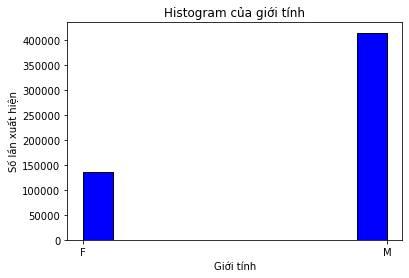

In [23]:
# Đếm số lượng nam và nữ
df["Gender"].value_counts()
import matplotlib.pyplot as plt
# Trực quan hóa (biểu đồ histogram)
plt.figure(figsize=(6, 4))
plt.hist(df["Gender"], bins=10, color="blue", edgecolor="black")
plt.xlabel("Giới tính")
plt.ylabel("Số lần xuất hiện")
plt.title("Histogram của giới tính")
plt.show()


# 6. Nhóm tuổi có mức chi tiêu trung bình cao nhất (1 điểm)

In [32]:
# Name: Purchase, dtype: float64
# Tính mức chi tiêu trung bình theo nhóm tuổi
df.groupby("Age")["Purchase"].mean()
by=['col1']
# Hiển thị nhóm tuổi có mức chi tiêu cao nhất
df.groupby("Age")["Purchase"].mean().sort_values(ascending=False)
# grades.sort_values(by='Final Exam', ascending=False).head()

Age
51-55    9534.808031
55+      9336.280459
36-45    9331.350695
26-35    9252.690633
46-50    9208.625697
18-25    9169.663606
0-17     8933.464640
Name: Purchase, dtype: float64

# 7. Thống kê mức chi tiêu

In [35]:
# Purchase
# count	550068.000000
# mean	9263.968713
# std	5023.065394
# min	12.000000
# 25%	5823.000000
# 50%	8047.000000
# 75%	12054.000000
# max	23961.000000
# Tính các đại lượng thống kê
df['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

Nhận xét:
-
-

# 8. Trực quan hóa phân bố chi tiêu

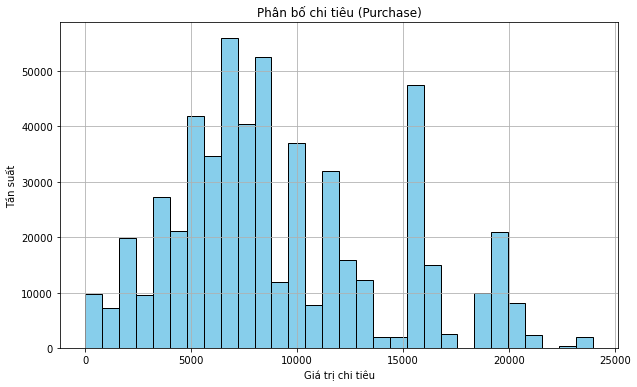

In [2]:
# Vẽ đồ thị Histogram hoặc Line hoặc hỗn hợp.
import matplotlib.pyplot as plt

# Vẽ histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Purchase'], bins=30, color='skyblue', edgecolor='black')
plt.title('Phân bố chi tiêu (Purchase)')
plt.xlabel('Giá trị chi tiêu')
plt.ylabel('Tần suất')
plt.grid(True)
plt.show()


Nhận xét:
-
-

# 9. Biểu đồ hộp so sánh mức chi tiêu theo nhóm tuổi và giới tính (1 điểm)






plt.figure(figsize=(6, 4))
plt.boxplot(df["total_bill"], vert=False)
plt.xlabel("Tổng tiền hóa đơn ")
plt.title("Boxplot của tổng hóa đơn")
plt.show()

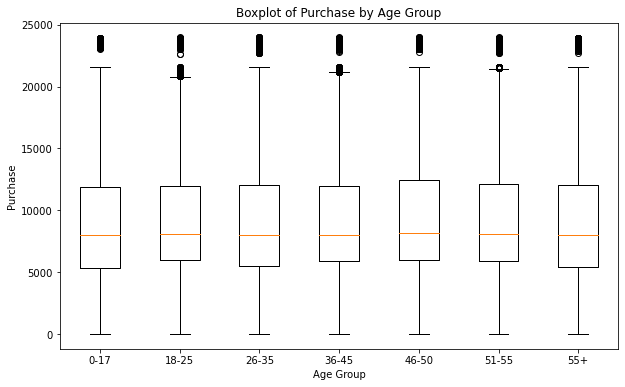

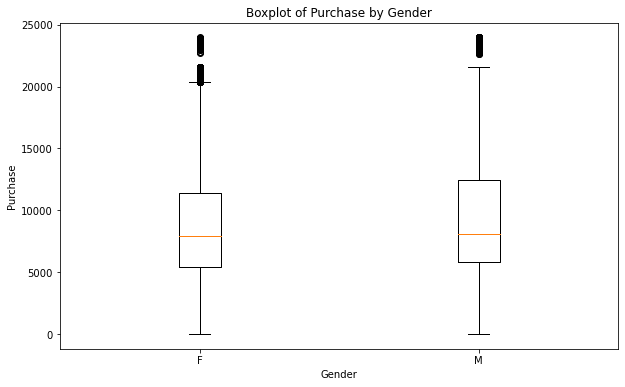

In [25]:
import matplotlib.pyplot as plt

# Nhóm dữ liệu theo Age và lấy cột Purchase cho mỗi nhóm
grouped_data = [df[df['Age'] == age]['Purchase'].values for age in df['Age'].unique()]

plt.figure(figsize=(10, 6))
plt.boxplot(grouped_data)

plt.title('Boxplot of Purchase by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Purchase')

age_groups = sorted(df['Age'].unique())
plt.xticks(range(1, len(age_groups) + 1), age_groups)

plt.show()

grouped_data_2 = [df[df['Gender'] == gender]['Purchase'].values for gender in df['Gender'].unique()]

plt.figure(figsize=(10, 6))
plt.boxplot(grouped_data_2)

plt.title('Boxplot of Purchase by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase')

gender_groups = df['Gender'].unique()
plt.xticks(range(1, len(gender_groups) + 1), gender_groups)

plt.show()


In [16]:
# plt.boxplot(df['Age'])
# plt.title("Boxplot")

# plt.show()
print(df['Age'].dtype)



object


# 10. Biểu đồ tròn thể hiện tỷ lệ tổng chi tiêu của từng nhóm tuổi

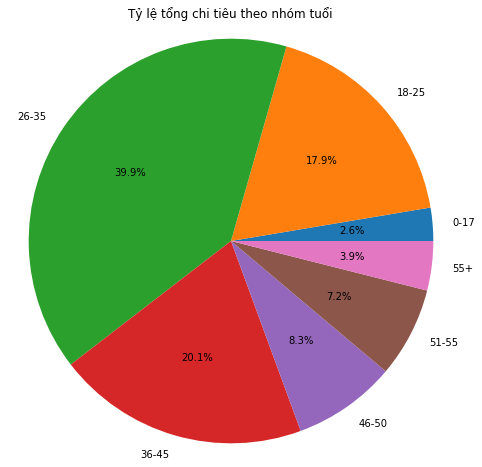

In [6]:
age_group = df.groupby('Age')['Purchase'].sum()

plt.figure(figsize=(8, 8))
plt.pie(age_group, labels=age_group.index, autopct='%1.1f%%')
plt.title('Tỷ lệ tổng chi tiêu theo nhóm tuổi')
plt.axis('equal')  # Đảm bảo biểu đồ tròn không bị méo
plt.show()


